In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 101s 1us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

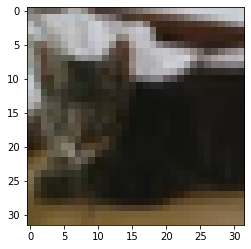

In [8]:
plt.imshow(X_train[9])

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [29]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [22]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense, Dropout

In [24]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(4,4), input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(4,4), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [30]:
model.fit(X_train, y_cat_train, epochs=15, batch_size=32, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3332 - accuracy: 0.5238 - val_loss: 1.2222 - val_accuracy: 0.5775
Epoch 2/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2084 - accuracy: 0.5731 - val_loss: 1.1470 - val_accuracy: 0.5987
Epoch 3/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1260 - accuracy: 0.6039 - val_loss: 1.0527 - val_accuracy: 0.6328
Epoch 4/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0699 - accuracy: 0.6244 - val_loss: 1.0085 - val_accuracy: 0.6485
Epoch 5/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0211 - accuracy: 0.6433 - val_loss: 1.0000 - val_accuracy: 0.6474
Epoch 6/15
1563/1563 [==============================] - 59s 37ms/step - loss: 0.9835 - accuracy: 0.6547 - val_loss: 0.9495 - val_accuracy: 0.6716
Epoch 7/15
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9438 - accuracy: 0.6693 - val_loss: 0.9592 -

In [33]:
loss = pd.DataFrame(model.history.history)

In [35]:
loss

,loss,accuracy,val_loss,val_accuracy
0,1.333180,0.52378,1.222235,0.5775
1,1.208396,0.57314,1.147016,0.5987
2,1.126012,0.60386,1.052685,0.6328
3,1.069935,0.62444,1.008490,0.6485
4,1.021061,0.64332,1.000043,0.6474
5,0.983543,0.65474,0.949542,0.6716
6,0.943803,0.66934,0.959248,0.6631
7,0.912850,0.67774,0.915079,0.6858
8,0.881665,0.69034,0.986513,0.6641
9,0.858905,0.69628,0.968666,0.6676


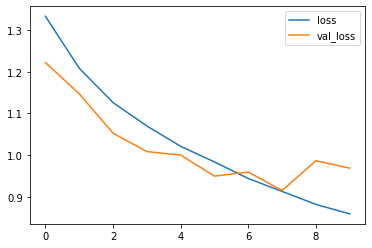

In [36]:
loss[["loss", "val_loss"]].plot()

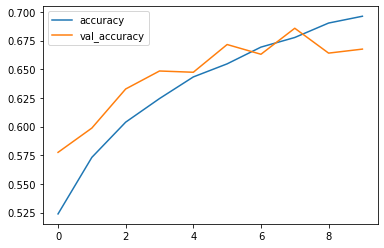

In [37]:
loss[["accuracy", "val_accuracy"]].plot()

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
y_preds = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [40]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.78      0.85      0.82      1000
           2       0.54      0.56      0.55      1000
           3       0.50      0.43      0.46      1000
           4       0.65      0.46      0.54      1000
           5       0.62      0.53      0.57      1000
           6       0.53      0.90      0.67      1000
           7       0.77      0.71      0.74      1000
           8       0.85      0.76      0.81      1000
           9       0.82      0.72      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.66     10000
weighted avg       0.68      0.67      0.66     10000



In [41]:
confusion_matrix(y_test, y_preds)

array([[767,  26,  58,  19,  17,   5,  21,   7,  55,  25],
       [ 32, 852,   3,  13,   0,   2,  19,   3,  21,  55],
       [ 70,   6, 555,  54,  44,  63, 164,  28,   6,  10],
       [ 28,  10,  87, 426,  62, 152, 181,  28,  13,  13],
       [ 26,   5, 137,  55, 457,  25, 220,  64,   9,   2],
       [ 17,   6,  75, 165,  38, 532, 101,  53,   7,   6],
       [  5,   6,  29,  32,   5,  12, 897,   7,   4,   3],
       [ 20,   5,  44,  39,  69,  61,  36, 707,   1,  18],
       [ 88,  46,  23,  20,   6,   4,  18,   5, 764,  26],
       [ 49, 128,  10,  29,   2,   6,  25,  17,  15, 719]], dtype=int64)

In [42]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.9686664342880249, 0.6675999760627747]

In [43]:
from tensorflow.keras.models import load_model
model.save("Cifar.h5")